## MAGIC Gamma Telescope Data Set
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope.

- Source: [UCI](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
cols=["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df["class"] = (df["class"] == "g").astype(int)

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

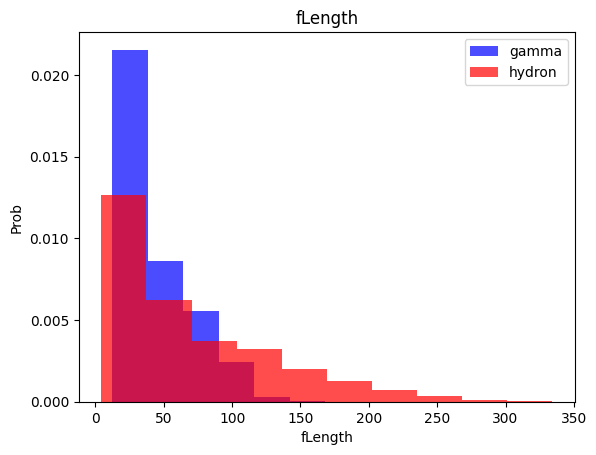

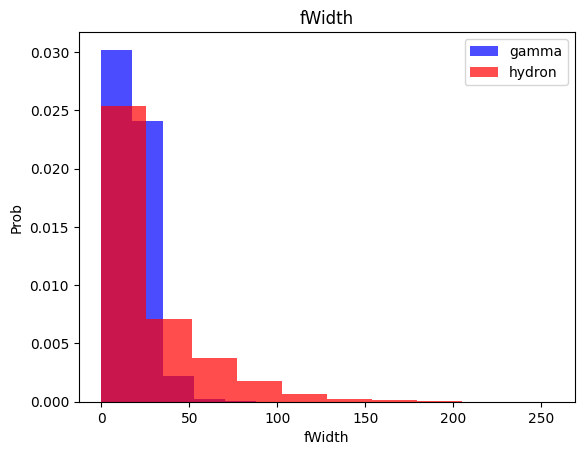

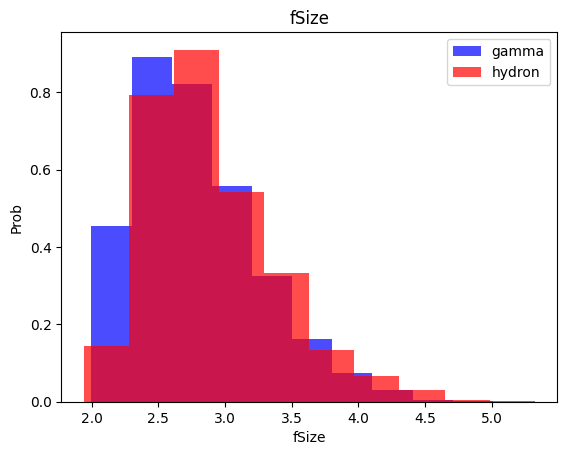

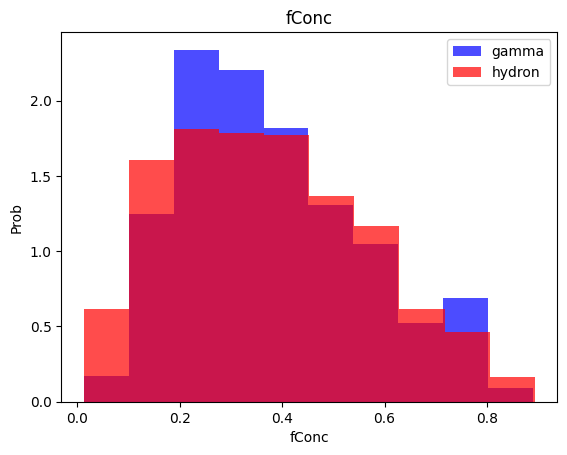

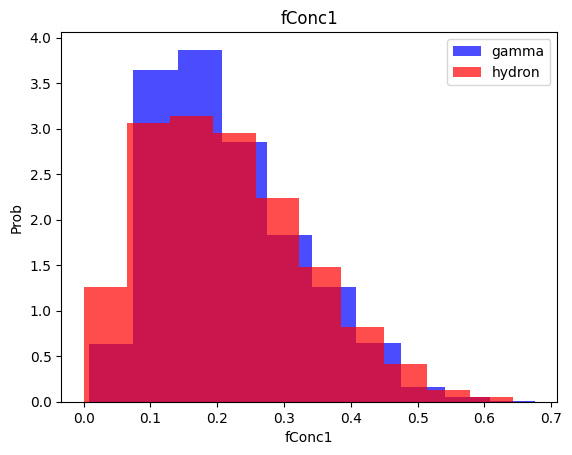

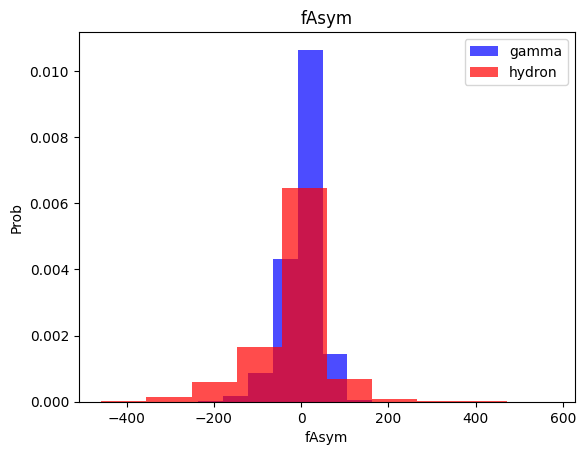

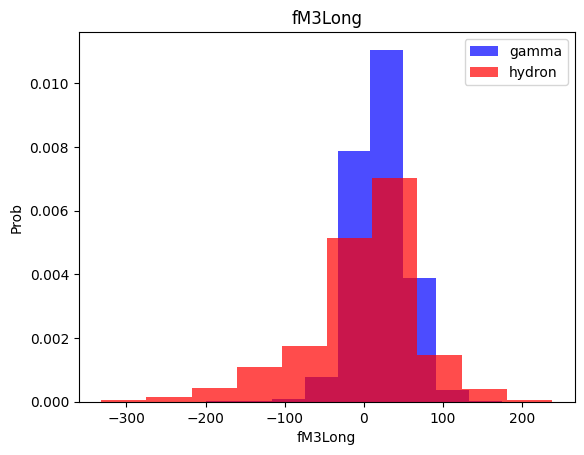

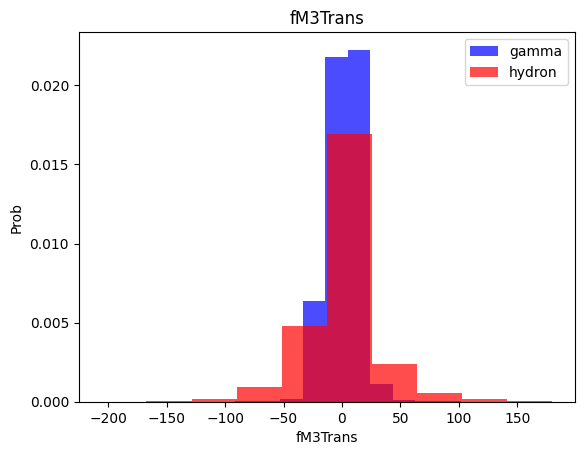

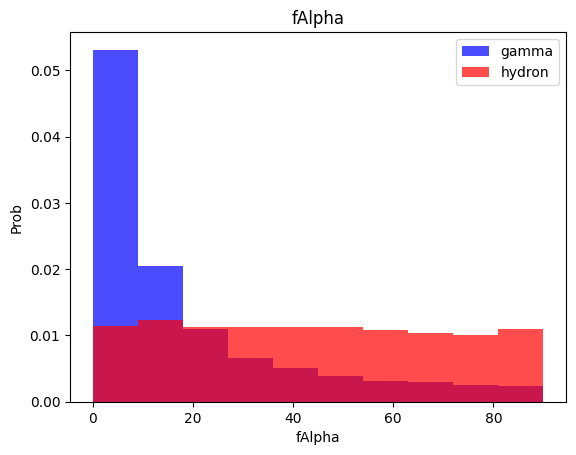

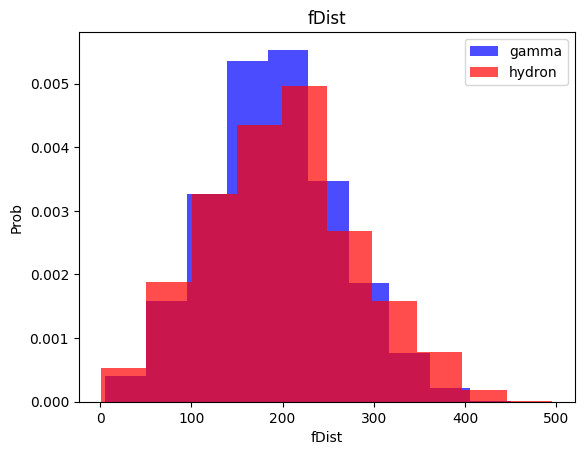

In [3]:
for i in cols[:-1]:
  plot.hist(df[df["class"] == 1][i], label="gamma", color="blue", alpha=0.7, density=True)
  plot.hist(df[df["class"] == 0][i], label="hydron", color="red", alpha=0.7, density=True)
  plot.title(i)
  plot.xlabel(i)
  plot.ylabel("Prob")
  plot.legend()
  plot.show()

## Train, Test, Validation datasets

In [4]:
train, test, valid = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [5]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_ds(dataframes, oversample = False):
  X = dataframes[dataframes.columns[:-1]].values
  y = dataframes[dataframes.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if(oversample):
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [6]:
train, X_train, y_train = scale_ds(train, oversample=True)
test, X_test, y_test = scale_ds(test, oversample=False)
valid, X_valid, y_valid = scale_ds(valid, oversample=False)

In [7]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

14836
7418
7418


## K nearst neighbours

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1378
           1       0.86      0.86      0.86      2426

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes

```
Bayes rule (conditional probability)
P(A | B) = P(B | A) * P(A) / P(B)
```

In [10]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1378
           1       0.72      0.90      0.80      2426

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.71      0.69      3804



## Logistic Regression

> using sigmoid function instead of linear model

In [17]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1378
           1       0.84      0.82      0.83      2426

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



## Support Vector Machines (SVM)

In [19]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [20]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1378
           1       0.89      0.90      0.90      2426

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.87      0.86      3804



## Neural Net

using tensorflow

In [26]:
# def plot_loss(history):
#   plot.plot(history.history['loss'], label='loss')
#   plot.plot(history.history['val_loss'], label='val_loss')
#   plot.xlabel('Epoch')
#   plot.ylabel('Binary crossentropy')
#   plot.legend()
#   plot.grid(True)
#   plot.show()

# def plot_accuracy(history):
#   plot.plot(history.history['accuracy'], label='loss')
#   plot.plot(history.history['val_accuracy'], label='val_loss')
#   plot.xlabel('Epoch')
#   plot.ylabel('Accuracy')
#   plot.legend()
#   plot.grid(True)
#   plot.show()

def plot_history(history):
  fig, (ax1, ax2) = plot.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plot.show()

In [31]:
import tensorflow as tf

def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid'),
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

  return nn_model, history

10 nodes at a dropout of 0 with learning rate 0.01 at batch of 32


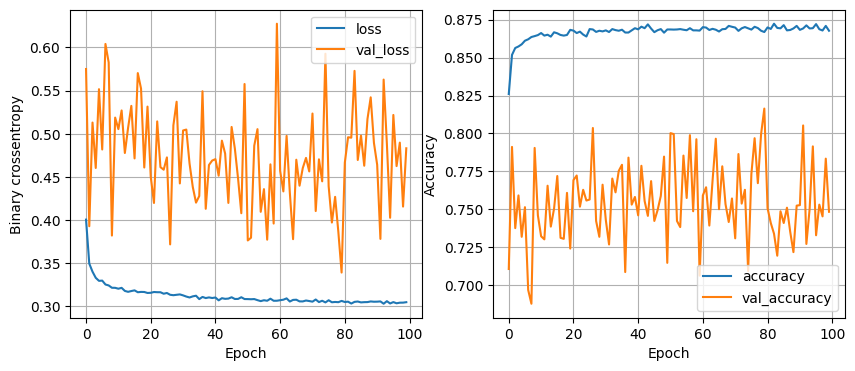

119/119 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8638
10 nodes at a dropout of 0 with learning rate 0.01 at batch of 64


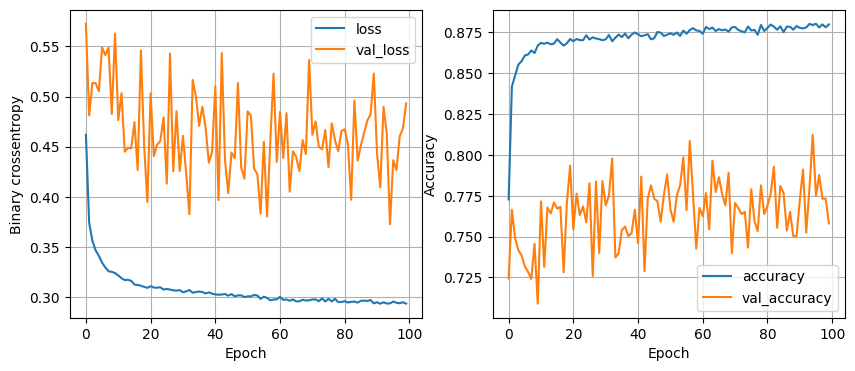

119/119 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.8641
10 nodes at a dropout of 0 with learning rate 0.01 at batch of 128


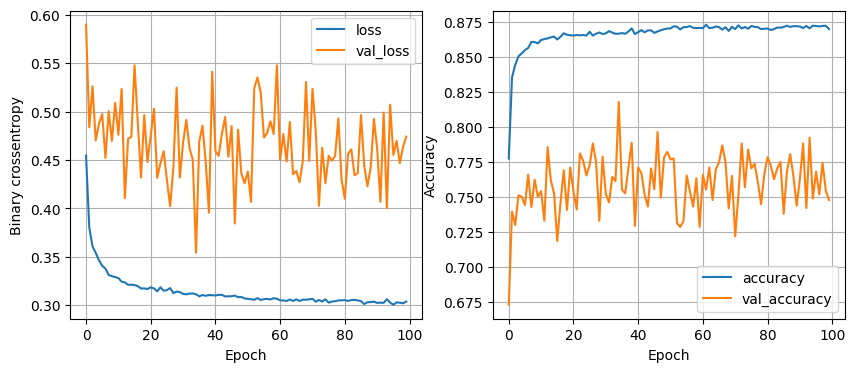

119/119 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.8633
10 nodes at a dropout of 0 with learning rate 0.05 at batch of 32


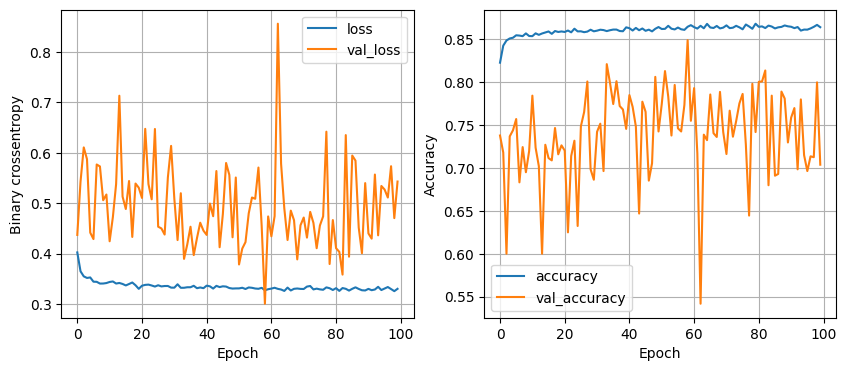

119/119 [==============================] - 1s 6ms/step - loss: 0.3280 - accuracy: 0.8612
10 nodes at a dropout of 0 with learning rate 0.05 at batch of 64


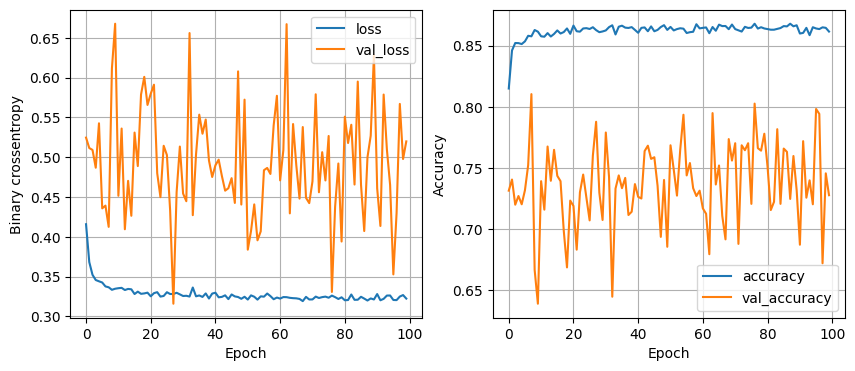

119/119 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8594
10 nodes at a dropout of 0 with learning rate 0.05 at batch of 128


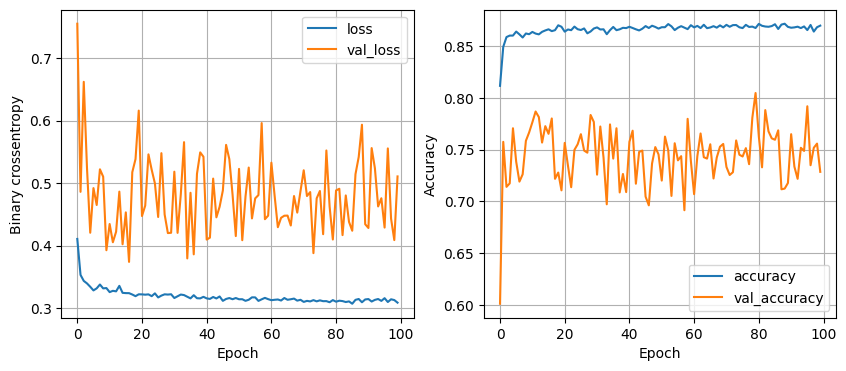

119/119 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8630
10 nodes at a dropout of 0 with learning rate 0.001 at batch of 32


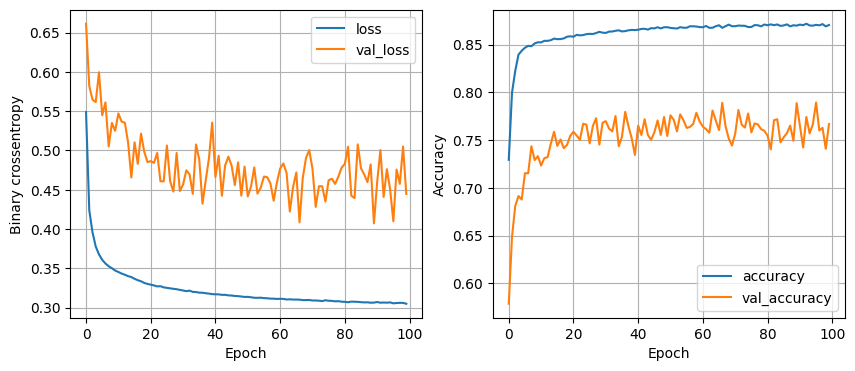

119/119 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8607
10 nodes at a dropout of 0 with learning rate 0.001 at batch of 64


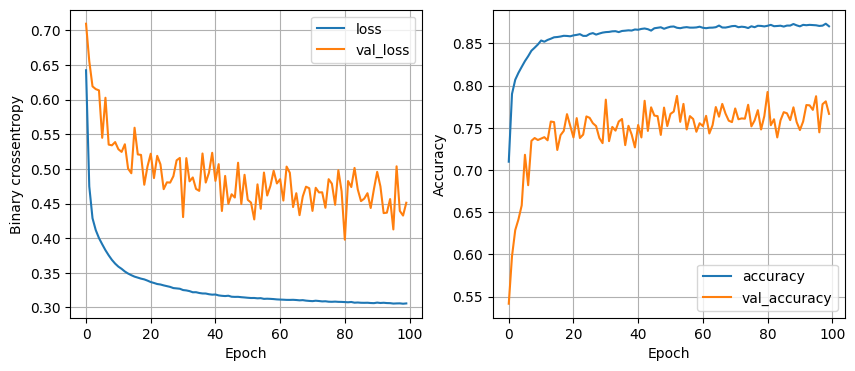

119/119 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8588
10 nodes at a dropout of 0 with learning rate 0.001 at batch of 128


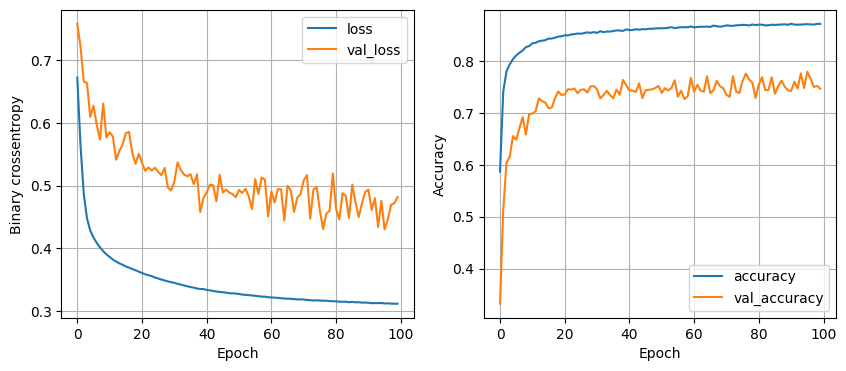

119/119 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8654
10 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 32


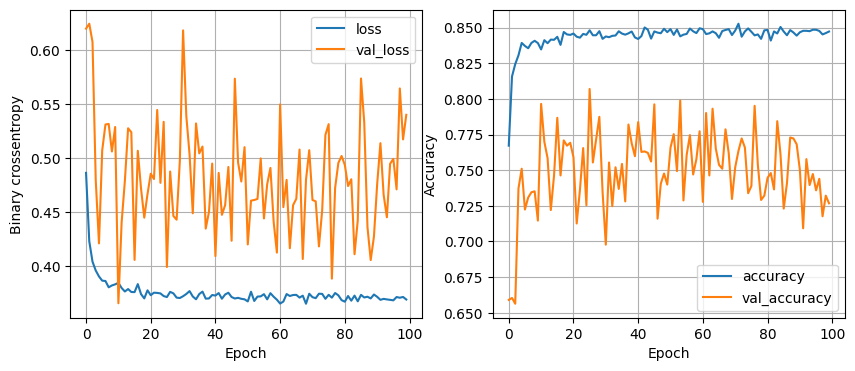

119/119 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8594
10 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 64


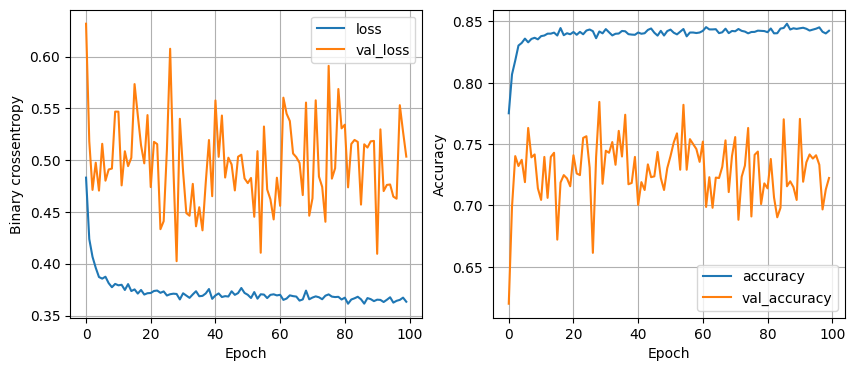

119/119 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8596
10 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 128


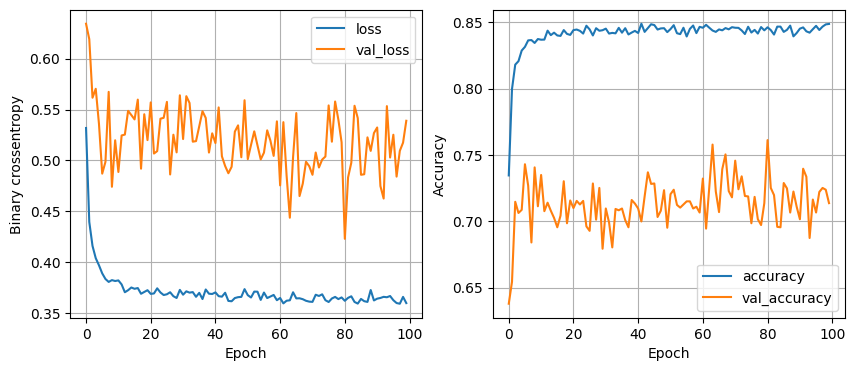

119/119 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8594
10 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 32


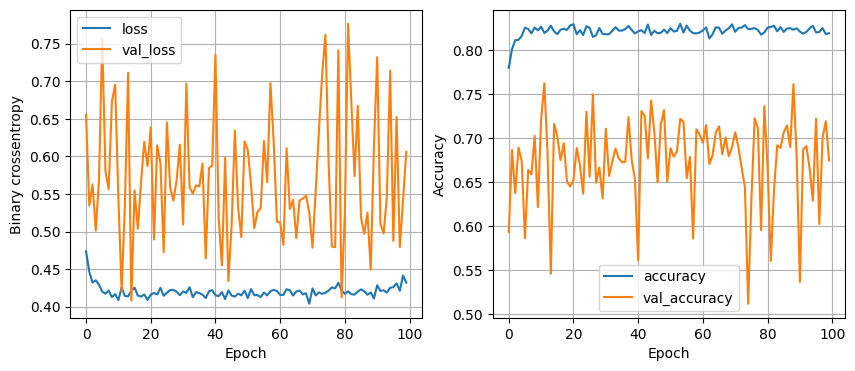

119/119 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8565
10 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 64


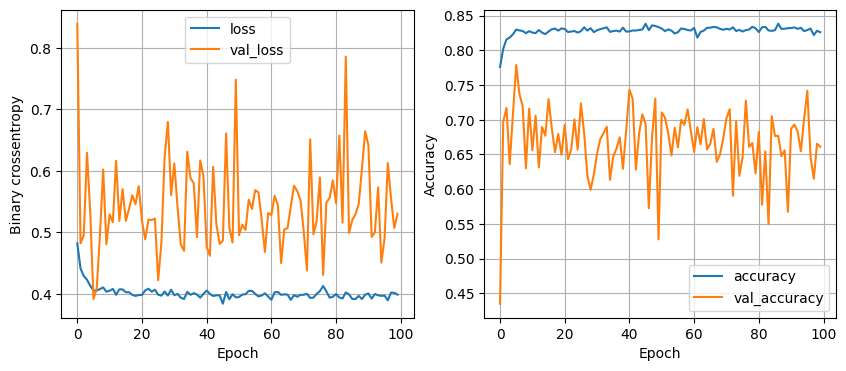

119/119 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8483
10 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 128


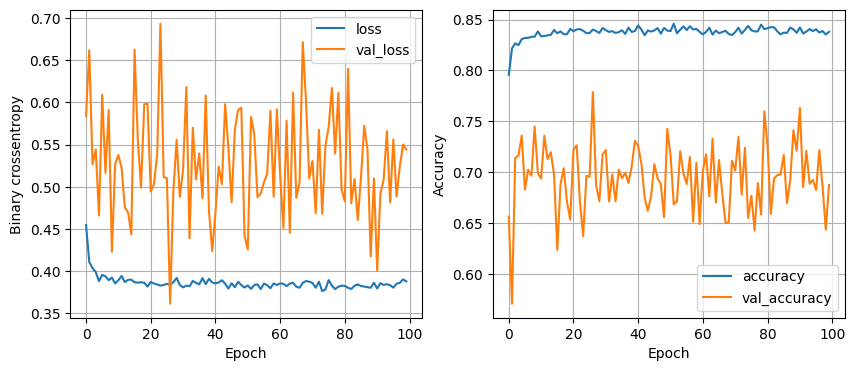

119/119 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.8565
10 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 32


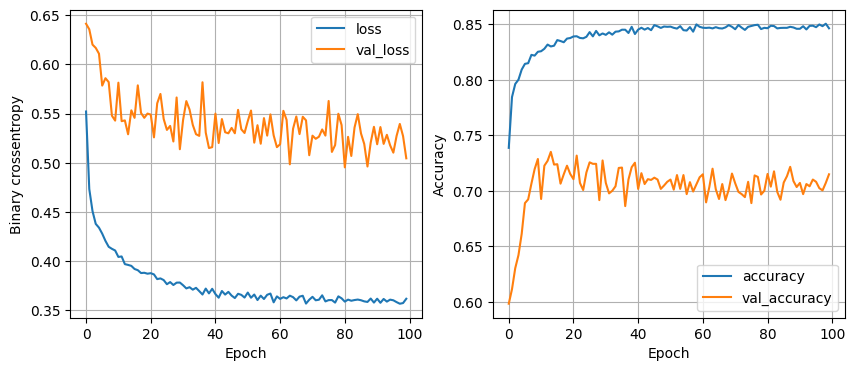

119/119 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8586
10 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 64


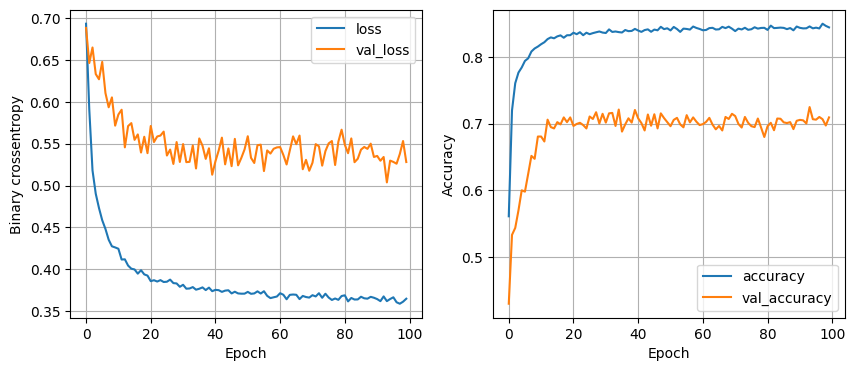

119/119 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8583
10 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 128


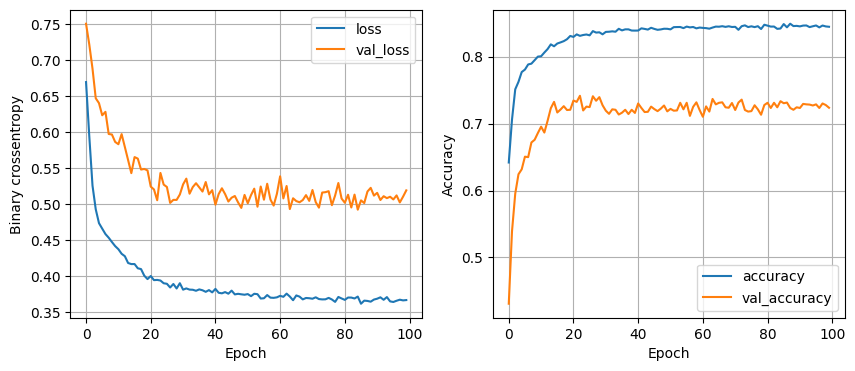

119/119 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8607
32 nodes at a dropout of 0 with learning rate 0.01 at batch of 32


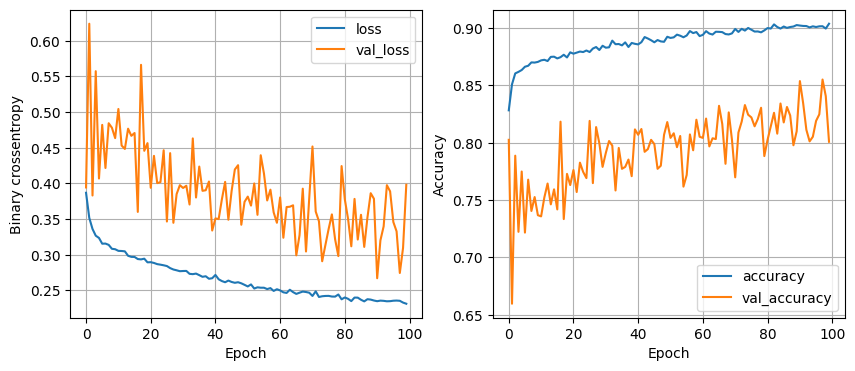

119/119 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8649
32 nodes at a dropout of 0 with learning rate 0.01 at batch of 64


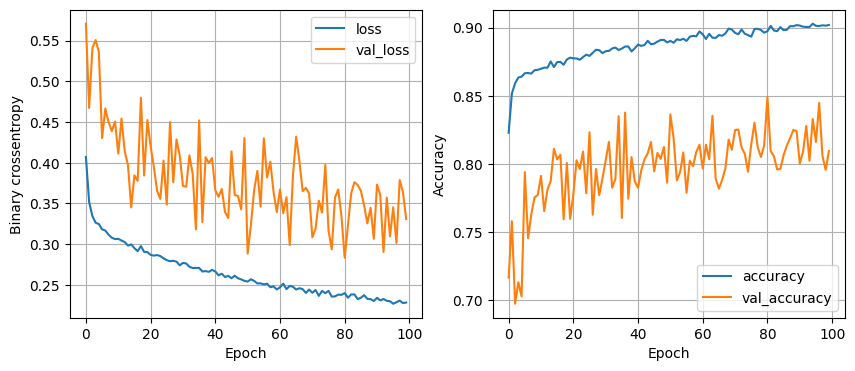

119/119 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8502
32 nodes at a dropout of 0 with learning rate 0.01 at batch of 128


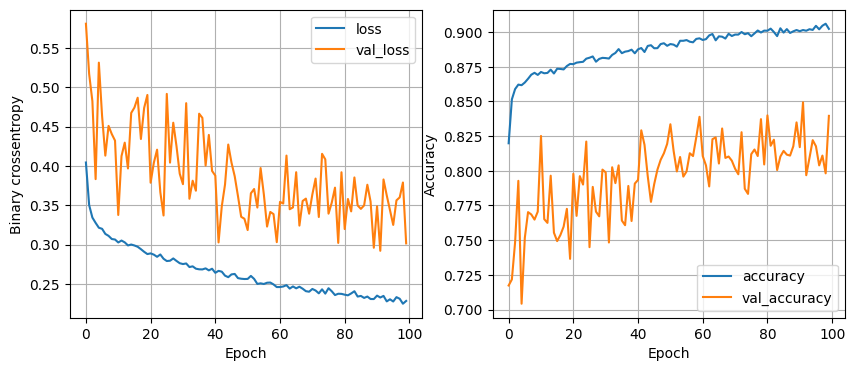

119/119 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8588
32 nodes at a dropout of 0 with learning rate 0.05 at batch of 32


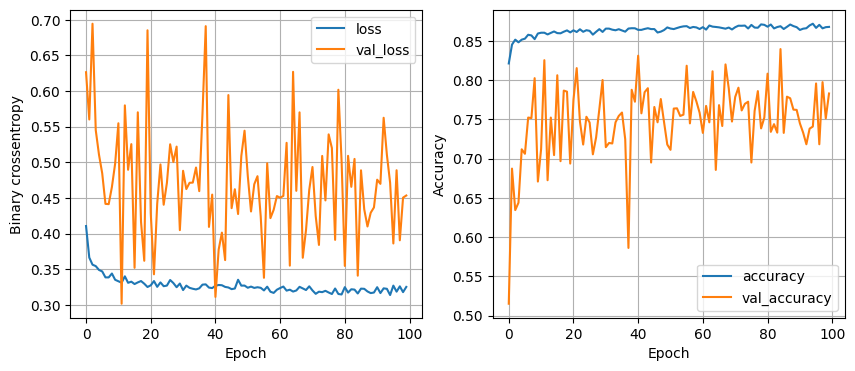

119/119 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8599
32 nodes at a dropout of 0 with learning rate 0.05 at batch of 64


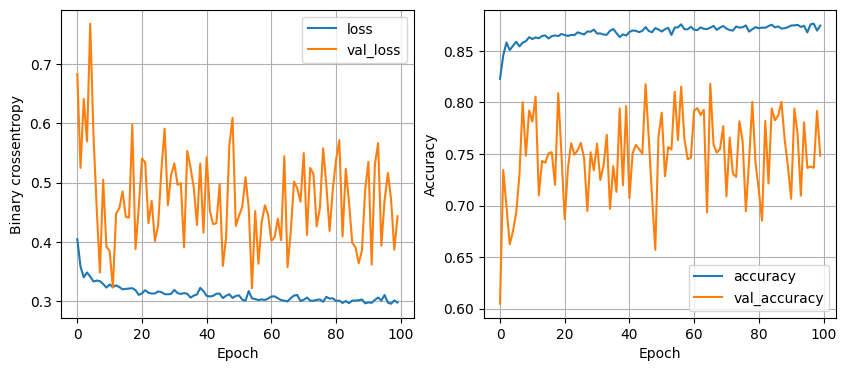

119/119 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8670
32 nodes at a dropout of 0 with learning rate 0.05 at batch of 128


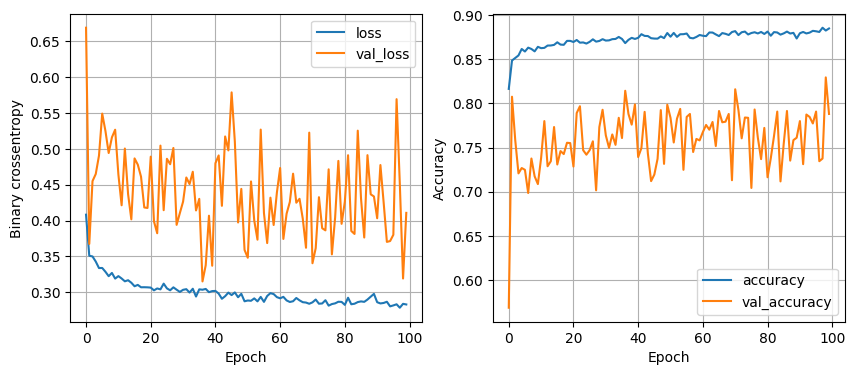

119/119 [==============================] - 1s 6ms/step - loss: 0.3656 - accuracy: 0.8533
32 nodes at a dropout of 0 with learning rate 0.001 at batch of 32


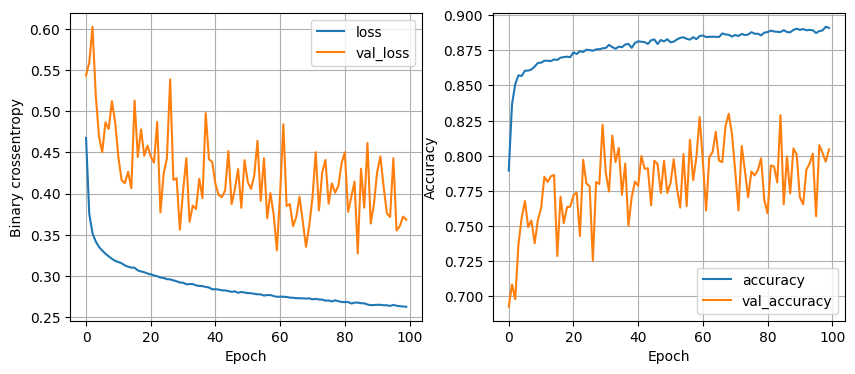

119/119 [==============================] - 1s 5ms/step - loss: 0.3360 - accuracy: 0.8630
32 nodes at a dropout of 0 with learning rate 0.001 at batch of 64


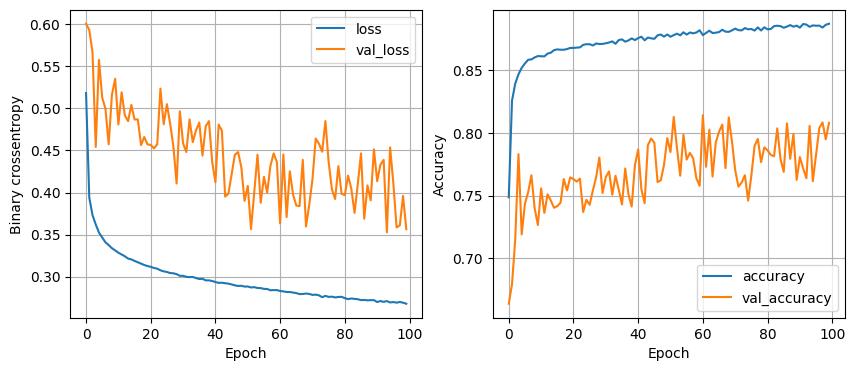

119/119 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.8599
32 nodes at a dropout of 0 with learning rate 0.001 at batch of 128


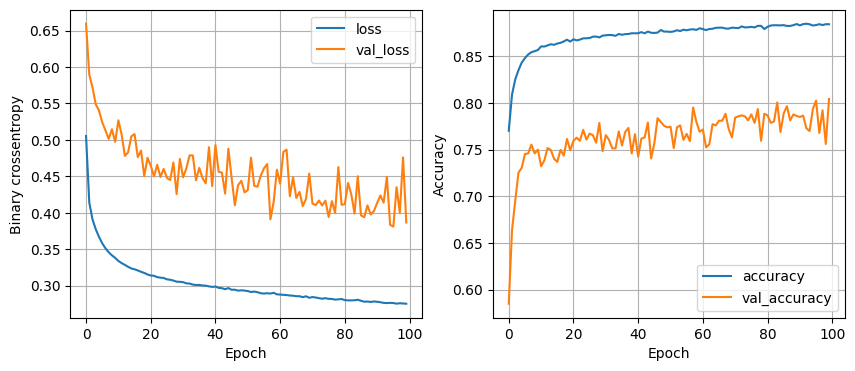

119/119 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8636
32 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 32


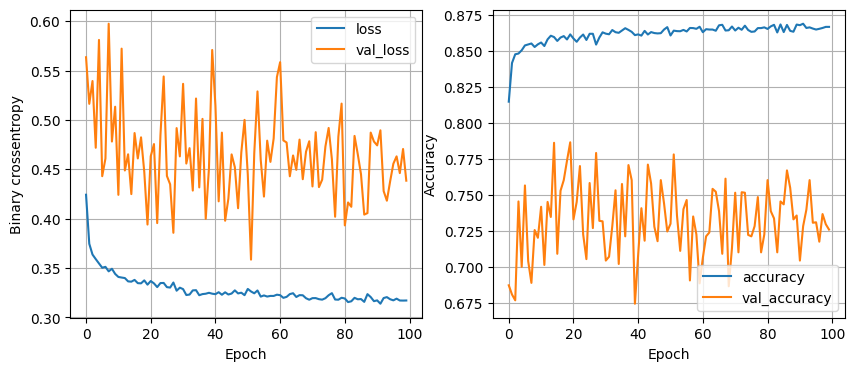

119/119 [==============================] - 1s 4ms/step - loss: 0.3268 - accuracy: 0.8646
32 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 64


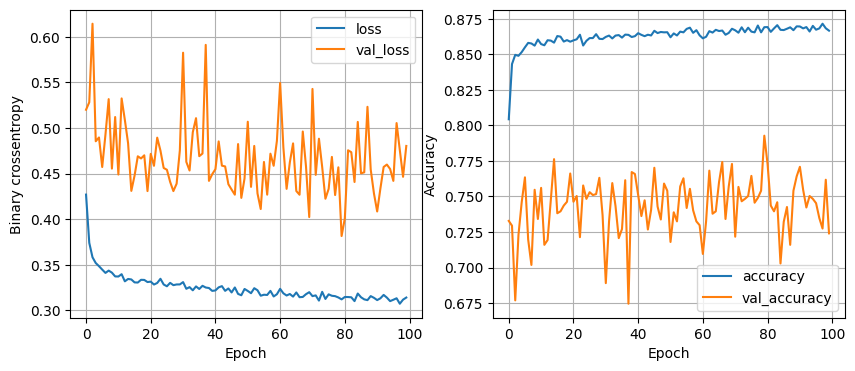

119/119 [==============================] - 1s 4ms/step - loss: 0.3186 - accuracy: 0.8646
32 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 128


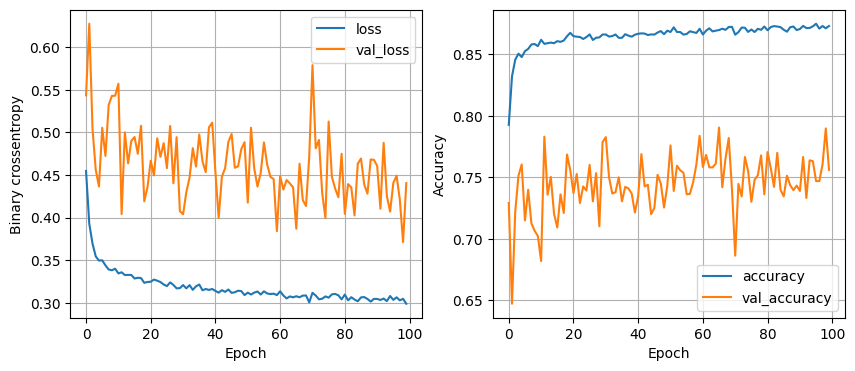

119/119 [==============================] - 0s 4ms/step - loss: 0.3134 - accuracy: 0.8709
32 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 32


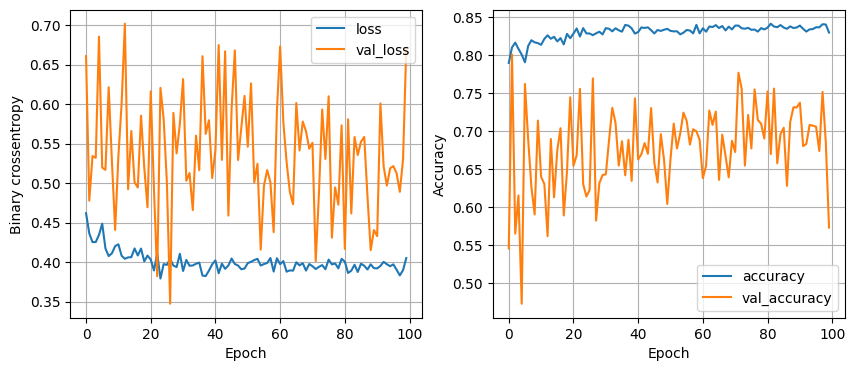

119/119 [==============================] - 1s 8ms/step - loss: 0.3739 - accuracy: 0.8373
32 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 64


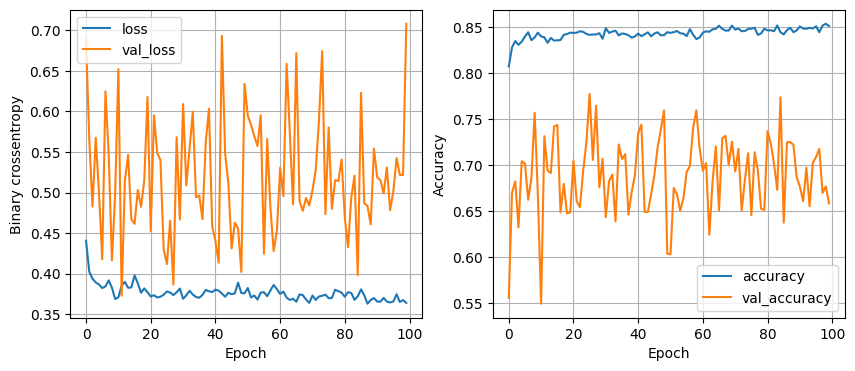

119/119 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8583
32 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 128


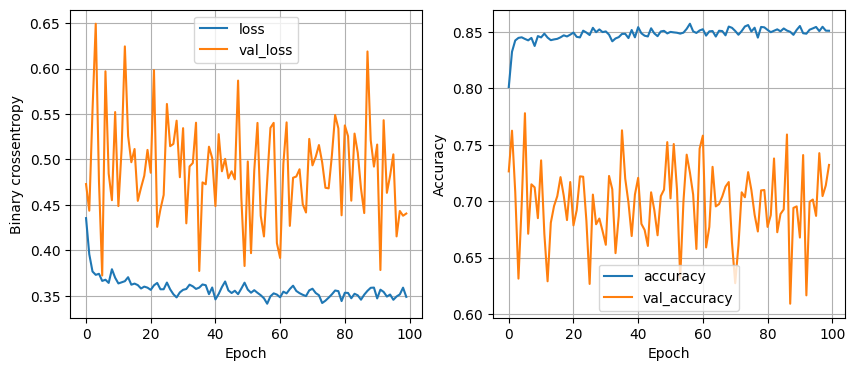

119/119 [==============================] - 1s 4ms/step - loss: 0.3457 - accuracy: 0.8554
32 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 32


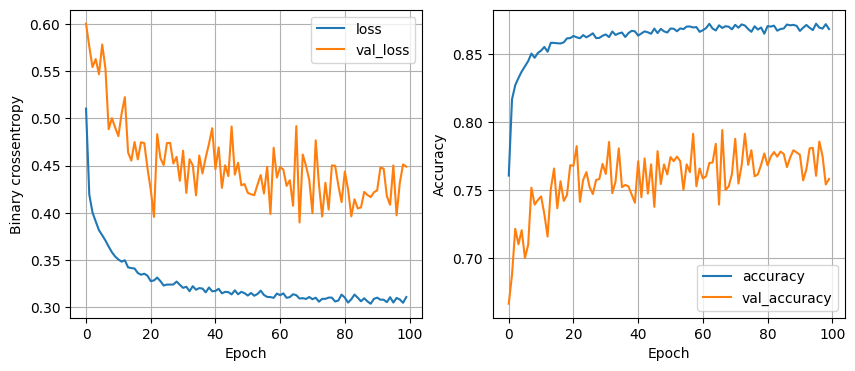

119/119 [==============================] - 1s 5ms/step - loss: 0.3100 - accuracy: 0.8733
32 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 64


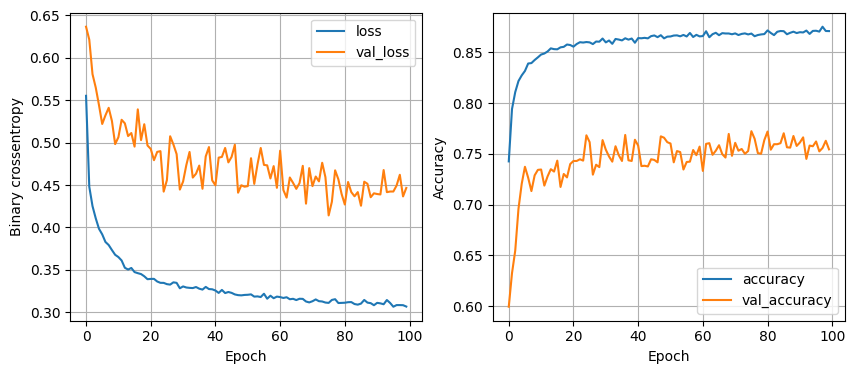

119/119 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8654
32 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 128


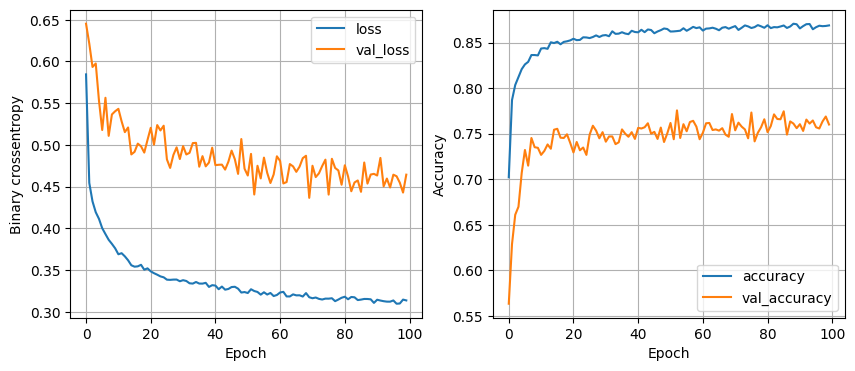

119/119 [==============================] - 1s 5ms/step - loss: 0.3125 - accuracy: 0.8693
64 nodes at a dropout of 0 with learning rate 0.01 at batch of 32


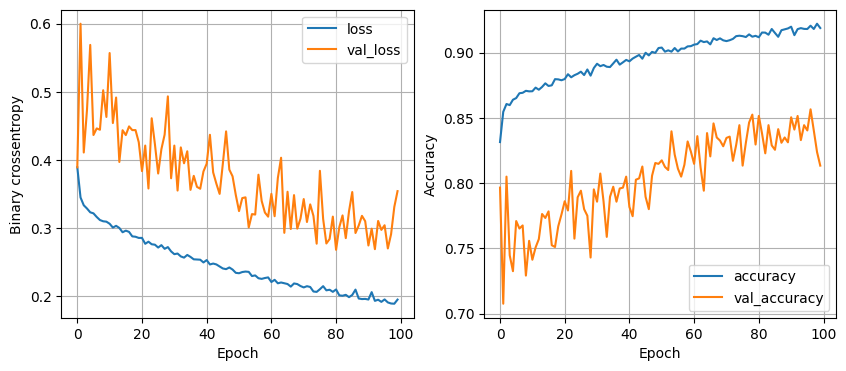

119/119 [==============================] - 1s 5ms/step - loss: 0.5620 - accuracy: 0.8512
64 nodes at a dropout of 0 with learning rate 0.01 at batch of 64


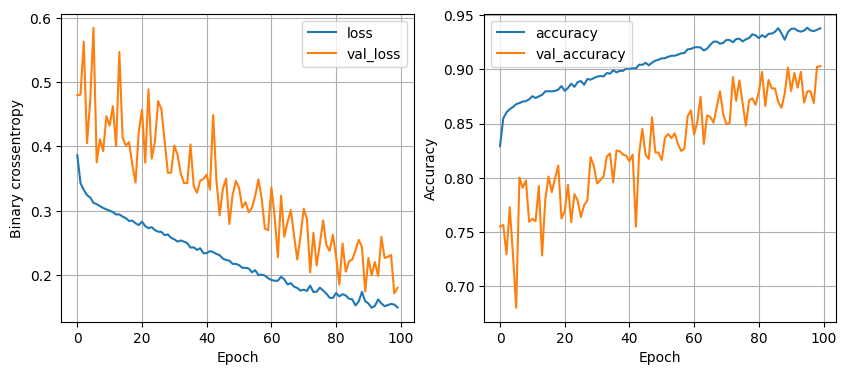

119/119 [==============================] - 1s 4ms/step - loss: 0.6240 - accuracy: 0.8446
64 nodes at a dropout of 0 with learning rate 0.01 at batch of 128


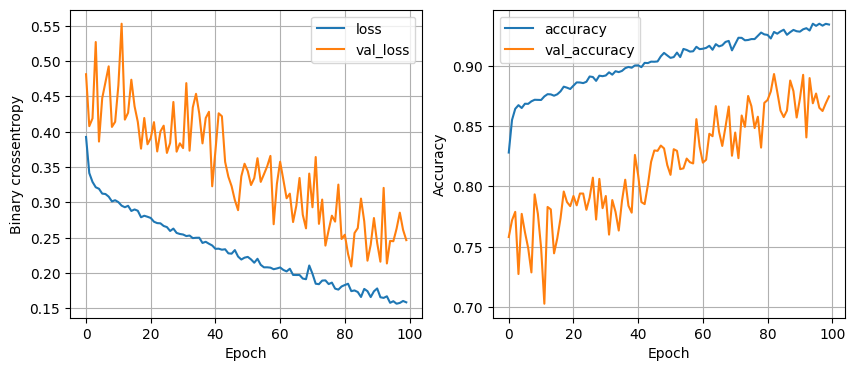

119/119 [==============================] - 1s 5ms/step - loss: 0.5604 - accuracy: 0.8554
64 nodes at a dropout of 0 with learning rate 0.05 at batch of 32


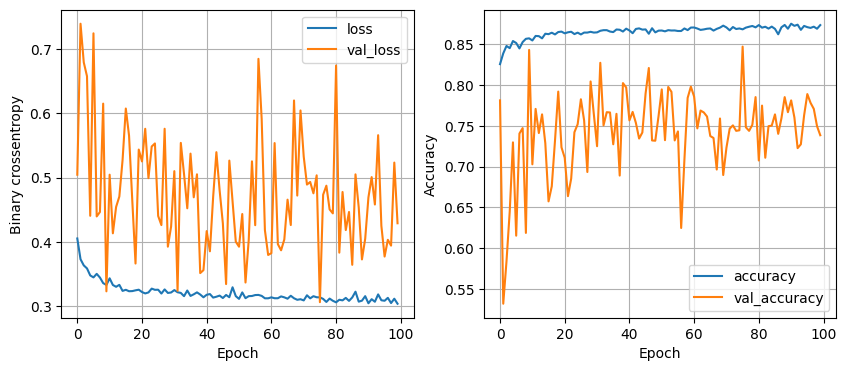

119/119 [==============================] - 1s 6ms/step - loss: 0.3380 - accuracy: 0.8667
64 nodes at a dropout of 0 with learning rate 0.05 at batch of 64


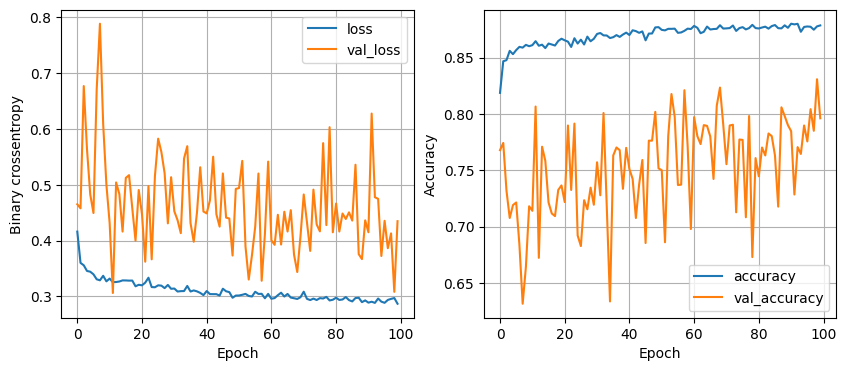

119/119 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8646
64 nodes at a dropout of 0 with learning rate 0.05 at batch of 128


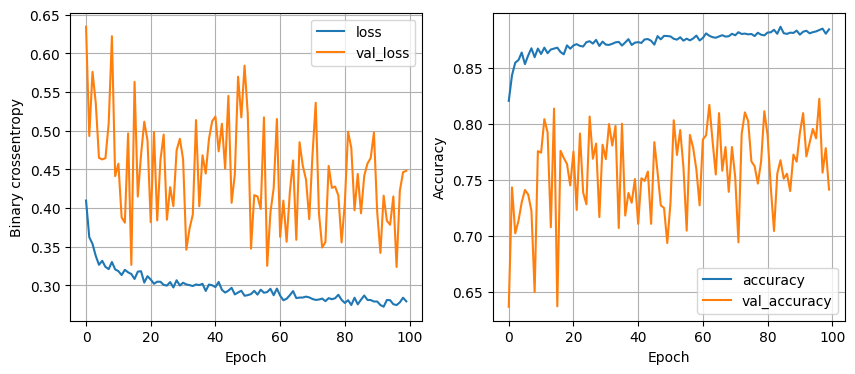

119/119 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8688
64 nodes at a dropout of 0 with learning rate 0.001 at batch of 32


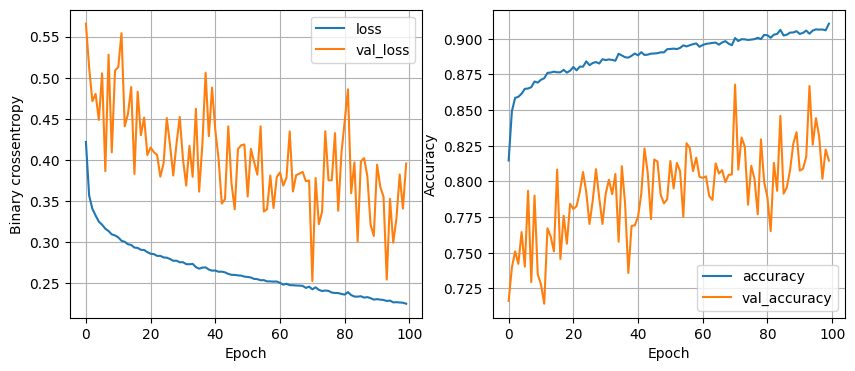

119/119 [==============================] - 1s 4ms/step - loss: 0.3609 - accuracy: 0.8654
64 nodes at a dropout of 0 with learning rate 0.001 at batch of 64


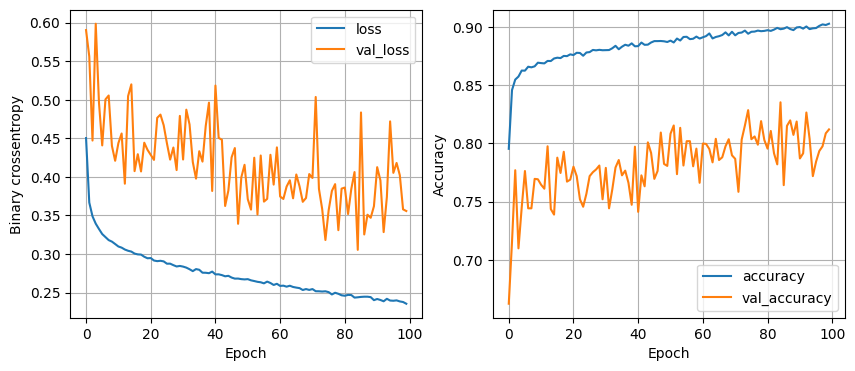

119/119 [==============================] - 1s 4ms/step - loss: 0.3374 - accuracy: 0.8596
64 nodes at a dropout of 0 with learning rate 0.001 at batch of 128


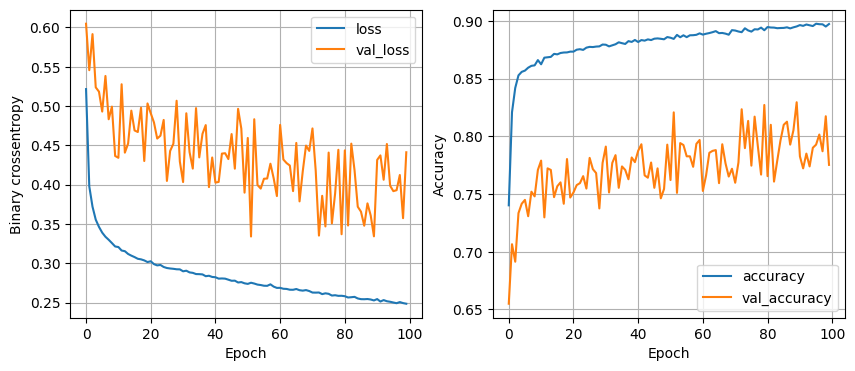

119/119 [==============================] - 1s 7ms/step - loss: 0.3282 - accuracy: 0.8657
64 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 32


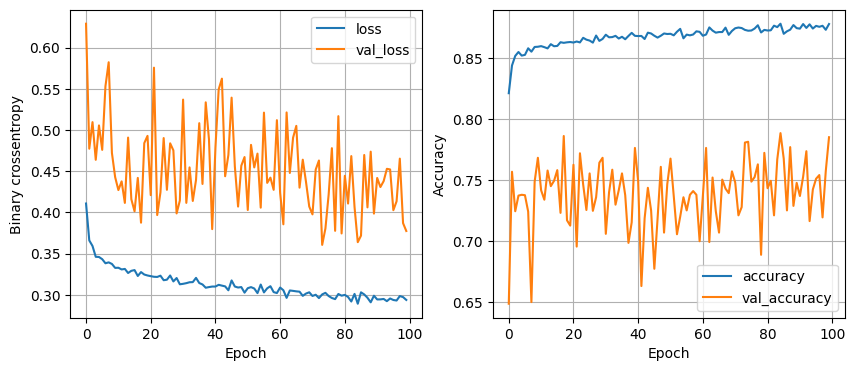

119/119 [==============================] - 1s 6ms/step - loss: 0.3251 - accuracy: 0.8696
64 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 64


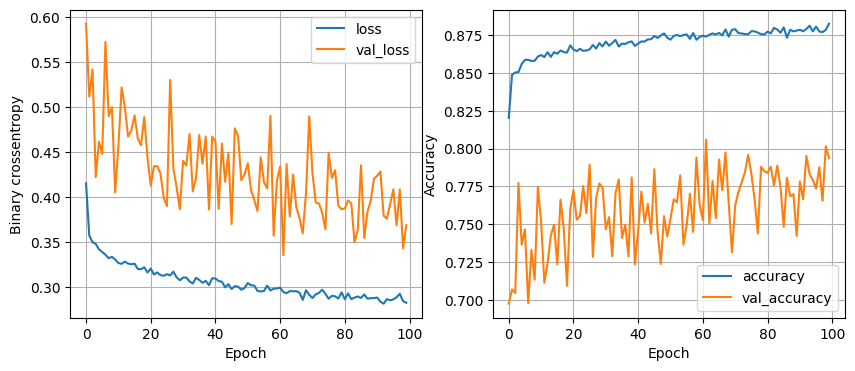

119/119 [==============================] - 1s 5ms/step - loss: 0.3225 - accuracy: 0.8665
64 nodes at a dropout of 0.2 with learning rate 0.01 at batch of 128


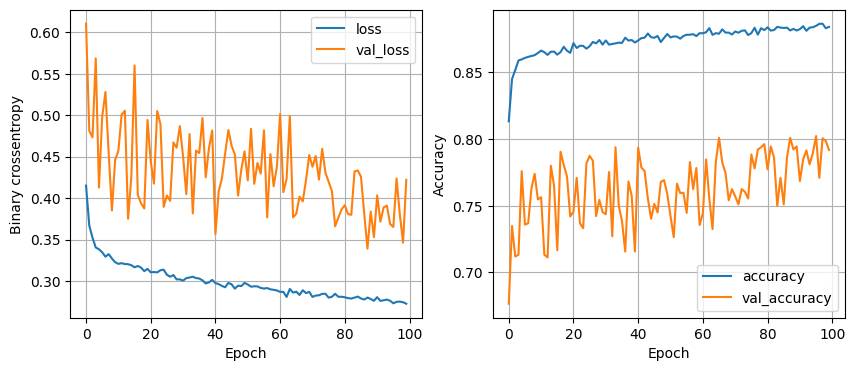

119/119 [==============================] - 1s 4ms/step - loss: 0.3206 - accuracy: 0.8725
64 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 32


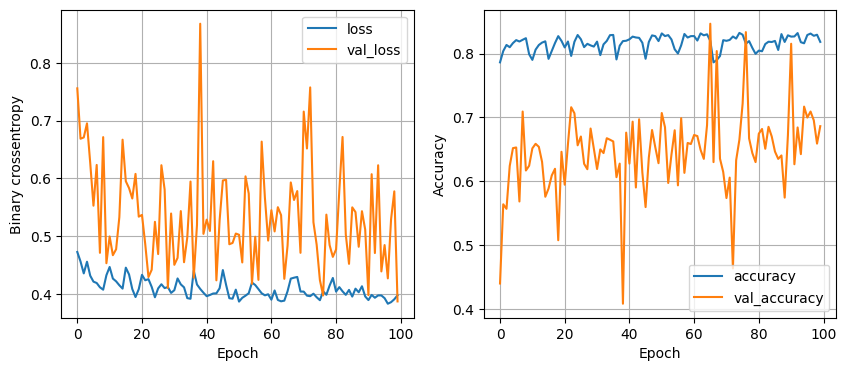

119/119 [==============================] - 1s 4ms/step - loss: 0.3939 - accuracy: 0.8520
64 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 64


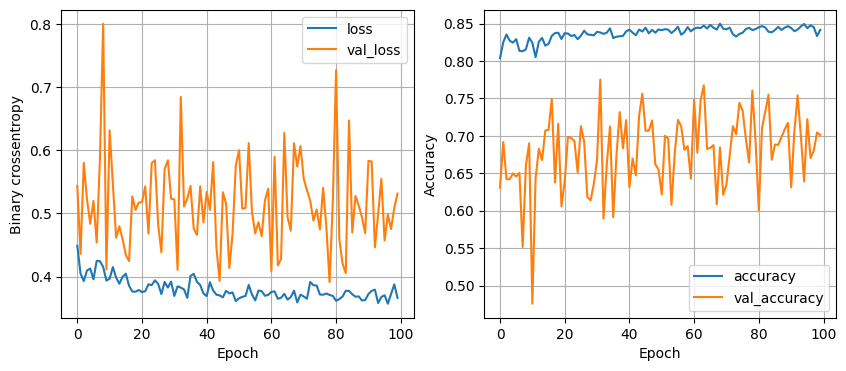

119/119 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8607
64 nodes at a dropout of 0.2 with learning rate 0.05 at batch of 128


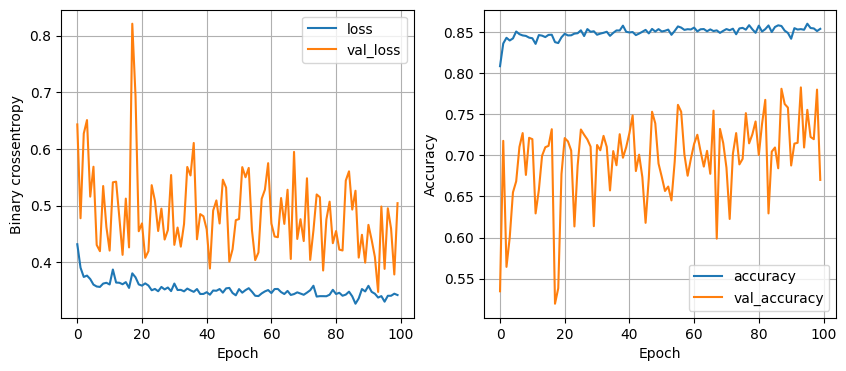

119/119 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8586
64 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 32


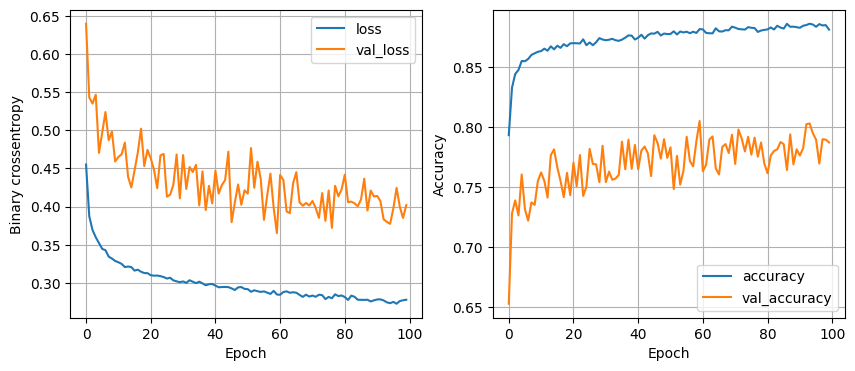

119/119 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.8667
64 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 64


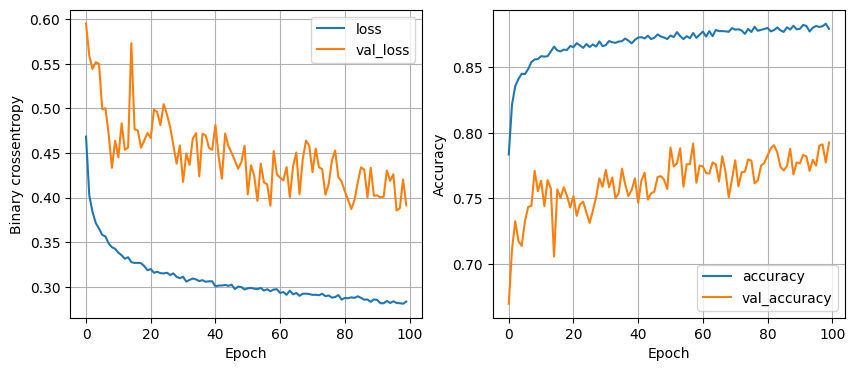

119/119 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8675
64 nodes at a dropout of 0.2 with learning rate 0.001 at batch of 128


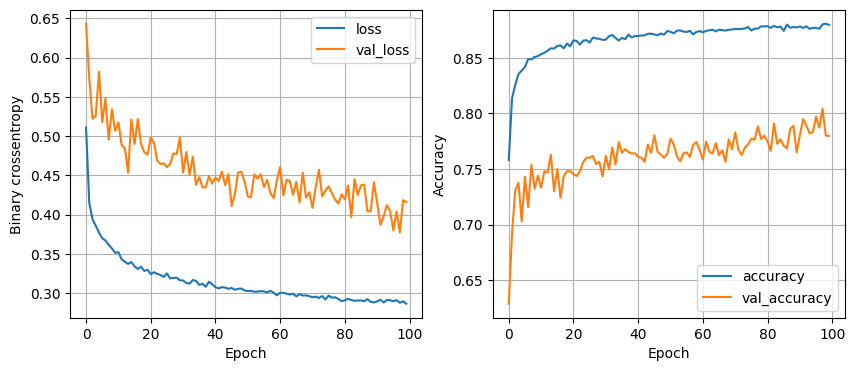

119/119 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8707


In [34]:
epochs = 100
least_val_loss = float('inf')
least_loss_model = None

for num_nodes in [10, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.05, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes at a dropout of {dropout_prob} with learning rate {lr} at batch of {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [35]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

119/119 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1378
           1       0.88      0.95      0.91      2426

    accuracy                           0.88      3804
   macro avg       0.89      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

